In [1]:
#importing essential libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle as pk
import numba as nb
from scipy import optimize

In [2]:
#creating lattice with random spin
def latticecreate(n):
    lattice = np.random.choice(a=[1],size=(n,n))
    return lattice

In [3]:
#metropolis algorithm , function return binders cumulant
@nb.jit
def calculateenergy(lattice,n,j,T):
    T=float(T)
    mag=0
    mo=0
    meg=0
    for k in range (0,10000):
        for l in range (0,100):
            x=np.random.randint(0,n)
            y=np.random.randint(0,n)
            
            nb = lattice[(x+1)%n,y] + lattice[x,(y+1)%n] + lattice[(x-1)%n,y] + lattice[x,(y-1)%n]
            
            deltaE=lattice[x,y]*2*nb*j
            p=random.uniform(0,1)
            if deltaE<0:
                lattice[x,y]=lattice[x,y]*(-1)
                mag1=magnetisation(lattice,n)
                meg=meg+mag1**2
                mag=mag+mag1**4
            else:
                r=math.exp((-deltaE)/(T))
                if p<r:
                    lattice[x,y]=lattice[x,y]*(-1)
                    meg=meg+mag1**2
                    mag=mag+mag1**4
                else:
                    lattice[x,y]=lattice[x,y]
                    mag1=magnetisation(lattice,n)
                    meg=meg+mag1**2
                    mag=mag+mag1**4
            mo=mo+1
            
       
    meg=(meg/mo)*3
    mag=(mag/mo)
            
    return (1-(mag/(meg**2)))

In [4]:
#function calculation for magnetisation
@nb.jit(nopython=True)
def magnetisation(lattice,n):
    mag1=0
    for i in range(0,n):
        for j in range(0,n):
            mag1=mag1+(lattice[i,j])
            #p=random.uniform(0,1)
            #mag2=mag2+(lattice[i,j]**2)
           # mag1=mag1+lattice[i,j]
    return (mag1/(n**2))#abs(1-(mag1/(3*(mag2**2))))

In [5]:
#fucntion to return bnders cumulant
def maglist(n,T,j):
    lattice1=latticecreate(n)
    cur=calculateenergy(lattice1,n,j,T)
    return cur

In [6]:
#getting curie temperature for different lattices
def curietemp(j):
    T=1.5
    cur4=[]
    cur8=[]
    cur10=[]
    Temp=[]

    while T<2.8:
        cur4.append(maglist(4,T,j))
        cur8.append(maglist(8,T,j))
        cur10.append(maglist(16,T,j))
        Temp.append(T)
        T=T+0.001
    return cur4,cur8,cur10,Temp

The plot for interaction constant = 1


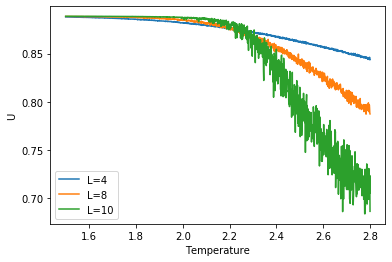

In [7]:
#running , collecting , binders cumulant for different lattices against temperature
j=1
cur4,cur8,cur10,Temp=curietemp(j)
print("The plot for interaction constant =",j)
plt.plot(Temp,cur4);
plt.plot(Temp,cur8);
plt.plot(Temp,cur10)
plt.xlabel("Temperature")
plt.ylabel("U")
legend=['L=4' , 'L=8', 'L=10']
plt.legend(legend)
plt.show()
